In [200]:
import numpy as np
import pandas as pd

In [201]:
pd.read_csv('/content/spam.csv', encoding='latin-1')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [142]:
df.sample(5)

,sms,label,num_characters,num_words,num_senteces,transformed_sms
5275,Its too late:)but its k.wish you the same.\n,0,43,12,[Its too late:)but its k.wish you the same.],late
2879,Hey Boys. Want hot XXX pics sent direct 2 ur p...,1,141,33,"[Hey Boys., Want hot XXX pics sent direct 2 ur...",hey
3436,"""Hi darlin i cantdo anythingtomorrow as mypare...",0,104,21,"[""Hi darlin i cantdo anythingtomorrow as mypar...",hi
388,Mm that time you dont like fun\n,0,31,7,[Mm that time you dont like fun],mm
195,How are you doing? Hope you've settled in for ...,0,93,22,"[How are you doing?, Hope you've settled in fo...",hope


In [143]:
df.shape

(5574, 6)


1. data cleaning
2. EDA
3. text preprocessing
3. model building
4. Evolution
5. improvement
6.  website
7. deployment




In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sms              5574 non-null   object
 1   label            5574 non-null   int64 
 2   num_characters   5574 non-null   int64 
 3   num_words        5574 non-null   int64 
 4   num_senteces     5574 non-null   object
 5   transformed_sms  5565 non-null   object
dtypes: int64(3), object(3)
memory usage: 261.4+ KB


In [145]:
df.sample(5)

,sms,label,num_characters,num_words,num_senteces,transformed_sms
5177,Raji..pls do me a favour. Pls convey my Birthd...,0,94,23,"[Raji..pls do me a favour., Pls convey my Birt...",raji
1713,o turns out i had stereo love on mi phone unde...,0,67,15,[o turns out i had stereo love on mi phone und...,turn
3071,I'm now but have to wait till 2 for the bus to...,0,56,16,[I'm now but have to wait till 2 for the bus t...,wait
1716,Asking do u knw them or nt? May be ur frnds or...,0,59,15,"[Asking do u knw them or nt?, May be ur frnds ...",ask
2120,I hope you know I'm still mad at you.\n,0,38,11,[I hope you know I'm still mad at you.],hope


In [146]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [147]:
df['label']=encoder.fit_transform(df['label'])

In [148]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


In [149]:
# missing values
df.isnull().sum()

sms                0
label              0
num_characters     0
num_words          0
num_senteces       0
transformed_sms    9
dtype: int64

In [150]:
df.shape

(5574, 6)

**2.EDA**

In [151]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


In [152]:
df['label'].value_counts()

0    4827
1     747
Name: label, dtype: int64

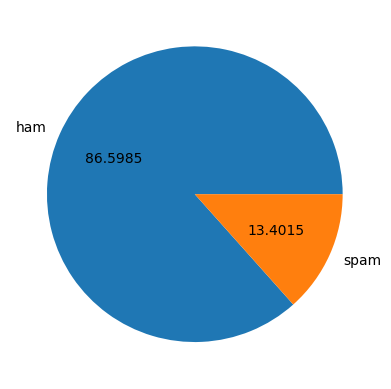

In [153]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.4f")
plt.show()

In [154]:
# data is inbalanced

In [155]:
import nltk

In [156]:
!pip install nltk

In [157]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [158]:
# number of character
df['sms'].apply(len)

0       112
1        30
2       156
3        50
4        62
       ... 
5569    161
5570     37
5571     58
5572    126
5573     27
Name: sms, Length: 5574, dtype: int64

In [159]:
# copy to another variable
df['num_characters']=df['sms'].apply(len)

In [160]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


In [161]:
# num of word
df['sms'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5569    [This, is, the, 2nd, time, we, have, tried, 2,...
5570      [Will, ü, b, going, to, esplanade, fr, home, ?]
5571    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5572    [The, guy, did, some, bitching, but, I, acted,...
5573                  [Rofl, ., Its, true, to, its, name]
Name: sms, Length: 5574, dtype: object

In [162]:
# count length
df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5569    35
5570     9
5571    15
5572    27
5573     7
Name: sms, Length: 5574, dtype: int64

In [163]:
# copy this to another variable
df['num_words']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))


In [164]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


In [165]:
# numbers of sentences
df['sms'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5569    [This is the 2nd time we have tried 2 contact ...
5570               [Will ü b going to esplanade fr home?]
5571    [Pity, * was in mood for that., So...any other...
5572    [The guy did some bitching but I acted like i'...
5573                        [Rofl., Its true to its name]
Name: sms, Length: 5574, dtype: object

In [166]:
# copy sentences to another variable
df['num_senteces']=df['sms'].apply(lambda x:nltk.sent_tokenize(x))

In [167]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


In [168]:
df[['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words
count,5574.000000,5574.000000
mean,81.478292,18.854324
std,59.848302,13.838509
min,3.000000,1.000000
25%,37.000000,9.000000
50%,63.000000,15.000000
75%,123.000000,27.000000
max,911.000000,220.000000


In [169]:
#Analysis ham
df[df['label']== 0][['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words
count,4827.000000,4827.000000
mean,72.471929,17.439196
std,58.326643,14.104466
min,3.000000,1.000000
25%,34.000000,8.000000
50%,53.000000,13.000000
75%,94.000000,23.000000
max,911.000000,220.000000


In [170]:
#Analysis  spam
df[df['label']== 1][['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words
count,747.000000,747.000000
mean,139.676037,27.998661
std,28.871250,6.855361
min,14.000000,2.000000
25%,134.000000,25.000000
50%,150.000000,29.000000
75%,158.000000,32.000000
max,224.000000,46.000000


In [171]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

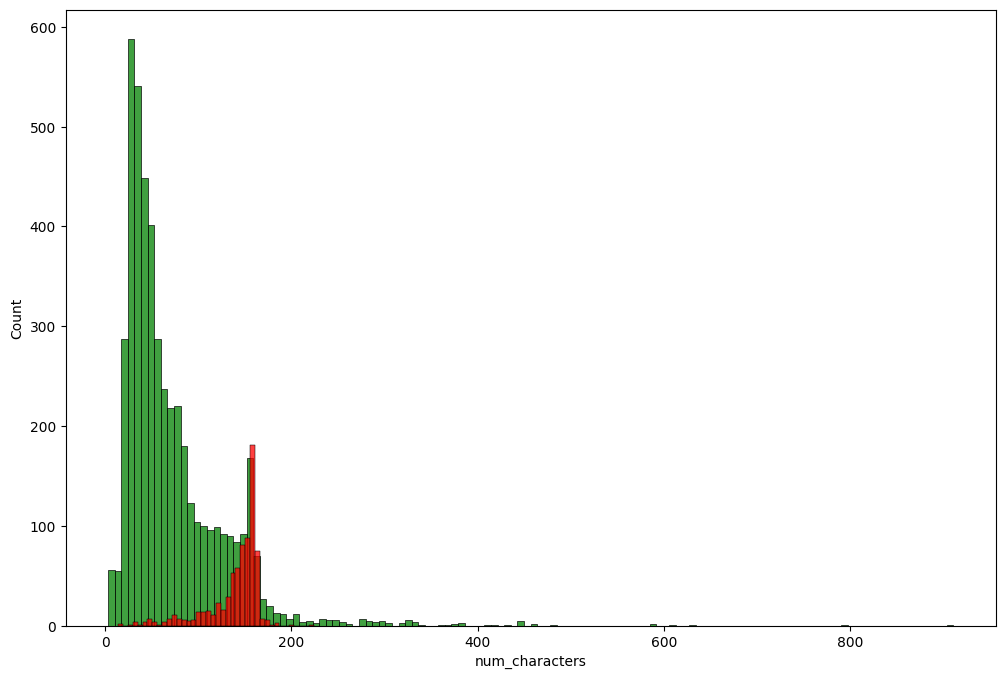

In [172]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']== 0]['num_characters'],color='green')
sns.histplot(df[df['label']== 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

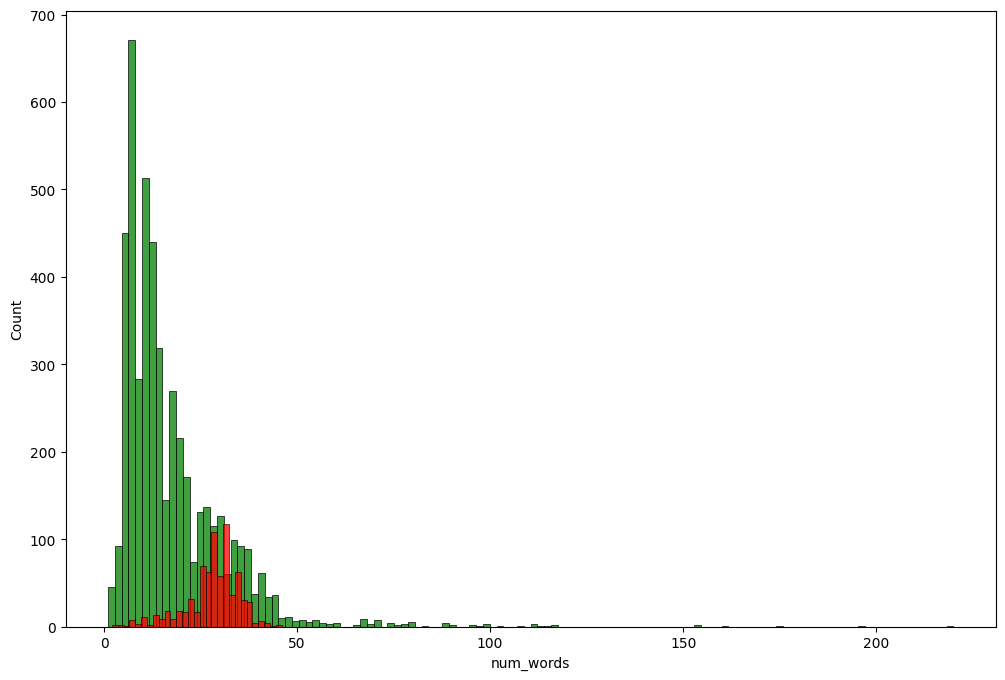

In [173]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']== 0]['num_words'],color='green')
sns.histplot(df[df['label']== 1]['num_words'],color='red')

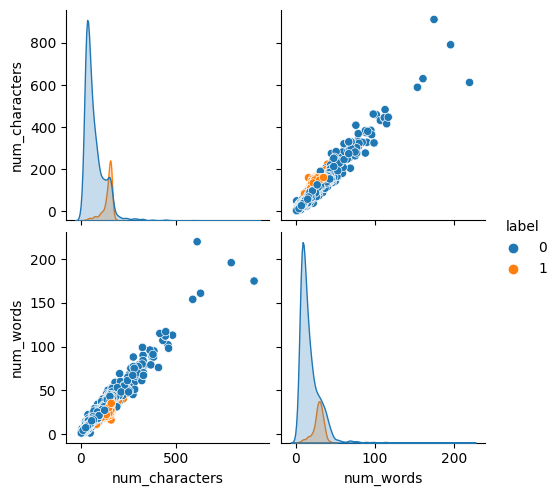

In [174]:
sns.pairplot(df,hue='label')

<ipython-input-175-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

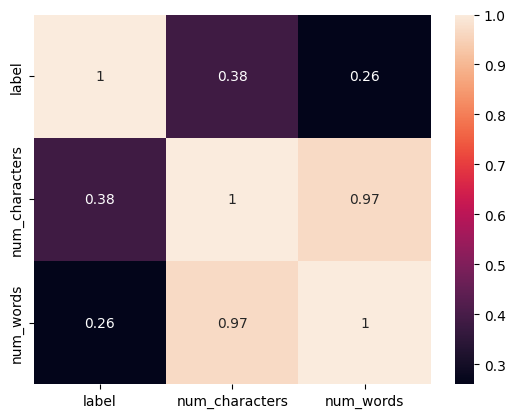

In [175]:
sns.heatmap(df.corr(),annot=True)

**3.Data Preprocessing**

*   Lower case
*   Tokenization
*   Removing speacial characters
*   Removing stop words and pactuation
*   Stemming





** Creating a function with the name of "text"**

In [176]:
def transform_sms(sms):
  sms = sms.lower()
  sms=nltk.word_tokenize(sms)


  y=[]
  for i in sms:
    if i.isalnum():
      y.append(i)

      sms=y[:]
      y.clear()
      for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

      sms=y[:]
      y.clear()

      for i in sms:
        y.append(ps.stem(i))

        return " ".join(y)





1.   Lower case
2.   Tokenization
3. Removing Special characters





The Natural Language Toolkit (NLTK) is an open source Python library
for Natural Language Processing.  A free online book is available.
(If you use the library for academic research, please cite the book.)

Steven Bird, Ewan Klein, and Edward Loper (2009).
Natural Language Processing with Python.  O'Reilly Media Inc.
https://www.nltk.org/book/

isort:skip_file

@version: 3.8.1

*   Stopwords




In [177]:
#transform_sms('I love the YT lectures on Data Science. How about you?')

In [178]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [179]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each



*   For Punctuation Marks




In [180]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'



*   Removing stop words and pactuation



In [181]:
#transform_sms('Did you like my presentation on')

In [182]:
df['sms'][200]

'Found it, ENC  &lt;#&gt; , where you at?\n'

In [183]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')
ps.stem('Reading')

'read'

In [184]:
df['transformed_sms']=df['sms'].apply(transform_sms)

In [185]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


**WordCloud**

In [186]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [187]:
wc.generate(df[df['label']== 1]['transformed_sms'].str.cat(sep=" "))

In [188]:
spam_wc=wc.generate(df[df['label']== 1]['transformed_sms'].str.cat(sep=" "))

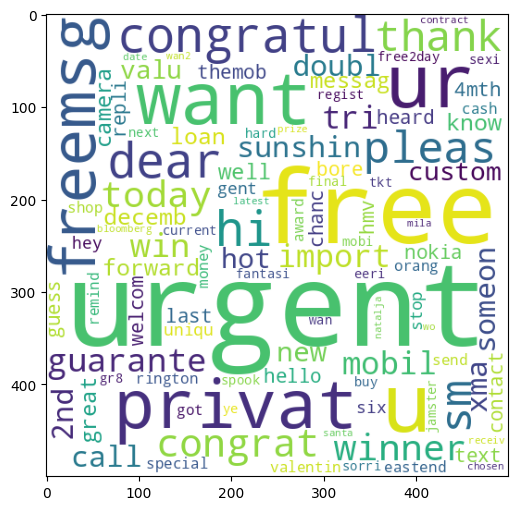

In [189]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [190]:
ham_wc=wc.generate(df[df['label']== 0]['transformed_sms'].str.cat(sep=" "))


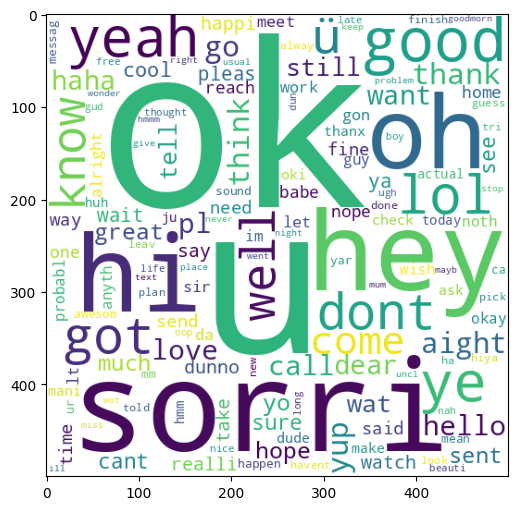

In [191]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [192]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


In [193]:
for msg in df[df['label']==1]['transformed_sms'].tolist():
  print(msg)

free
freemsg
winner
mobil
six
urgent
xxxmobilemovieclub
england
thank
07732584351
sm
congrat
valu
urgent
hear
pleas
free
gent
winner
privat
urgent
today
sunshin
want
rcv
freemsg
custom
winner
stop
bangbab
urgent
pleas
uniqu
500
u
text
u
congratul
tri
hey
ur
rington
hmv
custom
sm
themob
think
decemb
call
valentin
fanci
congratul
ur
xma
discount
thank
doubl
4mth
free
100
free
send
someon
urgent
congrat
loan
upgrdcentr
okmail
want
free
congrat
congratul
guarante
boltblu
credit
urgent
today
reciev
privat
monthlysubscript
gent
cash
mobil
tri
ur
special
privat
import
xclusiv
22
new
today
dear
privat
cash
88800
sm
get
hi
forward
review
4mth
08714712388
urgent
guarante
email
hi
u
realiz
import
romant
urgent
ur
import
ever
5
orang
last
free
guarante
congratul
u
smsservic
25p
u
dear
want
tri
last
urgent
today
talk
congratul
privat
hello
u
shop
sunshin
u
u
remind
free
lastest
januari
money
dear
urgent
get
ur
filthi
urgent
congrat
pleas
panason
free
guess
know
1000
18
eastend
new
someon
urgent
dea

In [194]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_sms'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [195]:
len(spam_corpus)

747

In [199]:
from collections  import Counter
import seaborn as sns
pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

(0        urgent
 1          free
 2             u
 3            ur
 4          want
 5        privat
 6       freemsg
 7     congratul
 8          dear
 9            hi
 10           sm
 11        pleas
 12          get
 13            1
 14        thank
 15      congrat
 16       winner
 17        today
 18     guarante
 19          win
 20        mobil
 21          tri
 22       import
 23      sunshin
 24         call
 25          xma
 26        doubl
 27       someon
 28          2nd
 29          new
 Name: 0, dtype: object,
 0     54
 1     39
 2     24
 3     20
 4     19
 5     16
 6     14
 7     13
 8     13
 9     13
 10    11
 11    11
 12    11
 13    11
 14    10
 15    10
 16     9
 17     9
 18     9
 19     9
 20     8
 21     8
 22     8
 23     7
 24     7
 25     7
 26     7
 27     7
 28     7
 29     6
 Name: 1, dtype: int64)

import pandas as pd
from collections import Counter
import seaborn as sns

spam_emails =[]  # Replace [...] with your spam email dataset

spam_words = []
for email in spam_emails:
    spam_words.extend(email.split())

word_counts = Counter(spam_words)
top_30_words = word_counts.most_common(30)
df = pd.DataFrame(top_30_words, columns=['Word', 'Count'])

sns.barplot(data=df, x='Word', y='Count')
